In [12]:
import os
import sys
sys.path.append(os.path.abspath("../src"))
sys.path.append(os.path.abspath("../lightning_logs"))

In [13]:
from utils_result import get_loss,get_standardised_loss
from plot import plot_bar_vertical
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import median_absolute_error
from utils_result import *
from scipy import stats
from plot import plot_bar_horizontal,plot_bar_vertical,vertical_boxplot,horizontal_boxplot,create_MAD_comparison_boxplot,create_MAD_comparison_violinplot

In [14]:
pool_predictions_val = "../results/final_models/CONFIG=final_pool,MODE=supervised,PRETRAIN=own,LR=0.0003262821190296,BS=2048,OPTIM=adamw,LOSS=mae,CLIP=True,ACTIVATION=gelu,SCHED=warmup_decay_cos,SIZE=180,NUMLAYERS=9,HIDDENSIZEMLP=120,DROPOUTMLP=0.1,ACTIVATIONMLP=relu,TYPE=pool/version_0/predictions/val_loss=0.1070.csv"
base_predictions_val = "../results/final_models/CONFIG=final_base,MODE=supervised,PRETRAIN=own,LR=0.0003262821190296,BS=2048,OPTIM=adamw,LOSS=mae,CLIP=True,ACTIVATION=gelu,SCHED=warmup_decay_cos,SIZE=180,NUMLAYERS=9,HIDDENSIZEMLP=120,DROPOUTMLP=0.1,ACTIVATIONMLP=relu,TYPE=base/version_0/predictions/val_loss=0.1125.csv"

In [15]:
base_predictions_test = "../results/final_models/CONFIG=final_base,MODE=supervised,PRETRAIN=own,LR=0.0003262821190296,BS=2048,OPTIM=adamw,LOSS=mae,CLIP=True,ACTIVATION=gelu,SCHED=warmup_decay_cos,SIZE=180,NUMLAYERS=9,HIDDENSIZEMLP=120,DROPOUTMLP=0.1,ACTIVATIONMLP=relu,TYPE=base/version_0/predictions/predict_loss=0.2406.csv"
pool_predictions_test = "../results/final_models/CONFIG=final_pool,MODE=supervised,PRETRAIN=own,LR=0.0003262821190296,BS=2048,OPTIM=adamw,LOSS=mae,CLIP=True,ACTIVATION=gelu,SCHED=warmup_decay_cos,SIZE=180,NUMLAYERS=9,HIDDENSIZEMLP=120,DROPOUTMLP=0.1,ACTIVATIONMLP=relu,TYPE=pool/version_0/predictions/predict_loss=0.2330.csv"

In [16]:
df_pool_val = pd.read_csv(pool_predictions_val, index_col=0)
df_base_val = pd.read_csv(base_predictions_val, index_col=0)
df_pool_test = pd.read_csv(pool_predictions_test, index_col=0)
df_base_test = pd.read_csv(base_predictions_test, index_col=0)

In [17]:
def median_absolute_deviation(series, threshold=None):
    if threshold is not None and len(series) < threshold:
        return None
    return stats.median_abs_deviation(series.values)

In [18]:
heterogenous_pool_predictions_val=df_pool_val.groupby('modified_sequence')['predictions'].apply(lambda x: median_absolute_deviation(x,2)).dropna()
heterogenous_peptides_truth_val=df_pool_val.groupby('modified_sequence')['label'].apply(lambda x: median_absolute_deviation(x,2)).dropna()

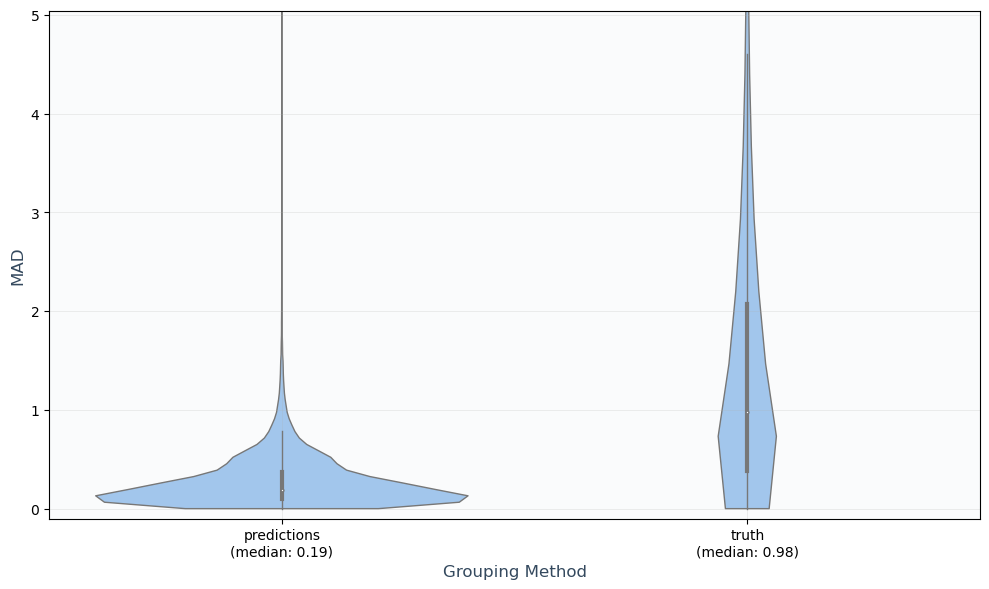

In [19]:
create_MAD_comparison_violinplot([heterogenous_pool_predictions_val,heterogenous_peptides_truth_val],["predictions","truth"],title="",percentile_cutoff=0.95)

In [20]:
heterogenous_pool_predictions_test=df_pool_test.groupby('modified_sequence')['predictions'].apply(lambda x: median_absolute_deviation(x,2)).dropna()
heterogenous_peptides_truth_test=df_pool_test.groupby('modified_sequence')['label'].apply(lambda x: median_absolute_deviation(x,2)).dropna()

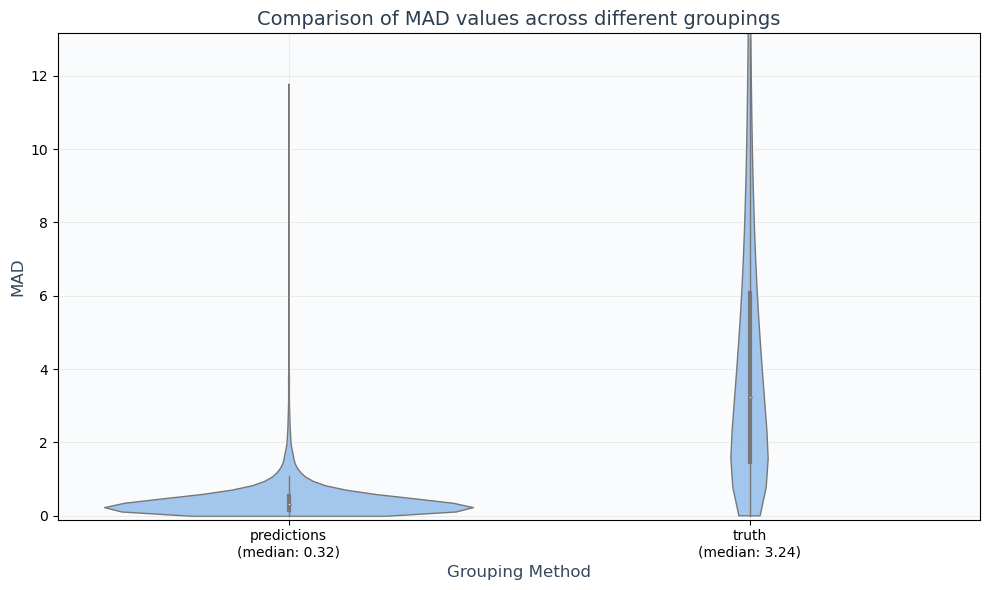

In [21]:
create_MAD_comparison_violinplot([heterogenous_pool_predictions_test,heterogenous_peptides_truth_test],["predictions","truth"],percentile_cutoff=0.95)